<a href="https://colab.research.google.com/github/Akshaypakhle10/Naval-Mine-Identification/blob/master/Naval_Mine_Identification_Using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Rock or Mine Prediction(NMI)

In [0]:
#We'll use the Sonar Dataset - https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

'''
Approach:
1. Read the dataset.
2. Define Features and Labels.
3. Encode the Dependent Variable.
4. Divide the dataset into two parts for training and testing
5. Tf data structure for holding Features, labels, etc
6. Implement the model
7. Train the model
8. Reduce MSE(loss) Optimize
9. Make prediction on test data
10. End
'''

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split

In [0]:
#Function to read the Dataset
def read_dataset():
  df =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
  #print(len(df.columns))
  
  X = df[df.columns[0:60]].values
  y = df[df.columns[60]]
  
  #Encode the dependent variable
  encoder = LabelEncoder()
  encoder.fit(y)
  y = encoder.transform(y)
  Y = one_hot_encode(y)
  print(X.shape)
  return(X,Y)

In [0]:
#Define Encoder Function
def one_hot_encode(labels):
  n_labels = len(labels)
  n_unique_labels = len(np.unique(labels))
  one_hot_encode = np.zeros((n_labels, n_unique_labels))
  one_hot_encode[np.arange(n_labels), labels] = 1
  return one_hot_encode

In [0]:
#Read Dataset
X,Y = read_dataset()

#Shuffle the dataset to mix up the rows
X,Y =  shuffle(X,Y, random_state=1)

# Convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.20, random_state = 415)

#Inspect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(207, 60)
(165, 60)
(165, 2)
(42, 60)
(42, 2)


In [0]:
#Define the important parameters and variable to work with the tensors
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape = 1, dtype = float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = "/content/gdrive/My Drive/Colab Notebooks/Naval Mine Identification" 

n_dim 60


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

epoch:  0  -  149.8118  - MSE: 27111.52752861038 - Train Accuracy: 0.54545456
epoch:  1  -  2.1895137  - MSE: 4.990209295542366 - Train Accuracy: 0.45454547
epoch:  2  -  5.474974  - MSE: 41.50522159224463 - Train Accuracy: 0.54545456
epoch:  3  -  1.2721603  - MSE: 7.331062078704027 - Train Accuracy: 0.45454547
epoch:  4  -  0.96951425  - MSE: 7.843614507073293 - Train Accuracy: 0.54545456
epoch:  5  -  0.69956  - MSE: 1.791377245291421 - Train Accuracy: 0.43030304
epoch:  6  -  0.69382393  - MSE: 2.042135597718527 - Train Accuracy: 0.53333336
epoch:  7  -  0.6923622  - MSE: 2.1829578893455244 - Train Accuracy: 0.54545456
epoch:  8  -  0.6918042  - MSE: 2.255824900893909 - Train Accuracy: 0.54545456
epoch:  9  -  0.69147456  - MSE: 2.3098796060322164 - Train Accuracy: 0.54545456
epoch:  10  -  0.6

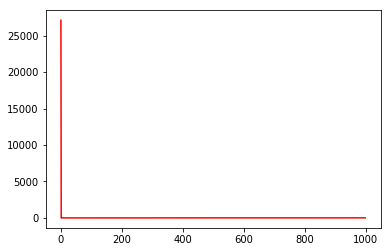

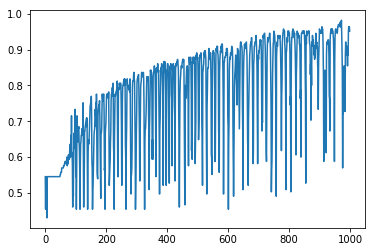

Test accuracy:  0.9285714
MSE: 8.2907


In [0]:
# Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32, [None,n_dim])
w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None,n_class])

#Define the model
def multilayer_perceptron(x,weights,biases):
  
  #Hidden layer with RELU activation
  layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)
  
  #Hidden layer with sigmoid activation
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)
  
  #Hidden layer with sigmoid activation
  layer_3 = tf.add(tf.matmul(layer_2,weights['h3']), biases['b3'])
  layer_3 = tf.nn.sigmoid(layer_3)
  
  #Hidden layer with RELU activation
  layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
  layer_4 = tf.nn.relu(layer_4)
  
  # output layer with linear activation
  out_layer = tf.add(tf.matmul(layer_4,weights['out']), biases['out'])
  return out_layer
  
  
#Define the wights and the biases for each layer
  
weights = {
      'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
      'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
      'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
      'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
      'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
  }
  
biases = {
      'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
      'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
      'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
      'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
      'out': tf.Variable(tf.truncated_normal([n_class])),
      
  }  
  
#Initialize all variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()
  
#Call the model defined
y = multilayer_perceptron(x,weights,biases)

#Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= y, labels= y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

#Calculate the cost and the accuracy for each epoch

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
  sess.run(training_step, feed_dict = {x:train_x, y_:train_y})
  cost = sess.run(cost_function, feed_dict = {x:train_x, y_:train_y})
  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  #print("Accuracy: ", (sess.run(accuracy, feed_dict = {x: test_x, y_: test_y})))
  pred_y = sess.run(y, feed_dict = {x: test_x})
  mse = tf.reduce_mean(tf.square(pred_y - test_y))
  
  mse_ = sess.run(mse)
  mse_history.append(mse_)
  accuracy = (sess.run(accuracy, feed_dict = {x:train_x, y_: train_y}))
  accuracy_history.append(accuracy)
  
  print('epoch: ', epoch, ' - ', cost, " - MSE:", mse_, "- Train Accuracy:", accuracy)
  
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)

#Plot mse and accuracy of graph

plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

#Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict = {x:test_x, y_: test_y})))
      
#Print the final MSE
pred_y = sess.run(y, feed_dict = {x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))